In [ ]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
df = read.csv('Measurement Investigation Data.csv')

head(df)

,daycount,shift,minute,partnum,y300
,<int>,<int>,<int>,<int>,<dbl>
1,6,1,7201,35,0.0
2,6,1,7202,35,1.4
3,6,1,7203,35,-3.4
4,6,2,7681,35,0.4
5,6,2,7682,35,-0.4
6,6,2,7683,35,-2.2


In [ ]:
result <- df %>%
  group_by(partnum) %>%
  summarise(
    mean_y300 = mean(y300, na.rm = TRUE),  # Mean of y300, excluding NA
    min_y300 = min(y300, na.rm = TRUE),    # Minimum of y300, excluding NA
    max_y300 = max(y300, na.rm = TRUE),    # Maximum of y300, excluding NA
    sd_y300 = sd(y300, na.rm = TRUE)       # Standard deviation of y300, excluding NA
  ) %>%
  ungroup()  # Ensure the result is no longer grouped

# View the optimized result
print(result)

# A tibble: 3 × 5
  partnum mean_y300 min_y300 max_y300 sd_y300
    <int>     <dbl>    <dbl>    <dbl>   <dbl>
1      35      -0.4     -4.2      3.6    1.58
2    3875     -13.3    -15.2    -10.6    1.13
3    6271      10.7      8.2     14.2    1.40


$$
\mathrm{sd}(measurement)=\sqrt{\frac{1.577685^2+1.128009^2+1.397718^2}{3}} = 1.38023064145454 $\approx 1.38
$$

In [ ]:
# Calculation of standard deviation measurement
# Using the sqrt and sum functions for clarity and efficiency
sd_measurement <- sqrt(sum(c(1.577685, 1.128009, 1.397718)^2) / 3)
sd_measurement  # Display the calculated standard deviation measurement

# Calculation of the overall mean of y300, excluding NA values
# Using the mean function with na.rm = TRUE to handle missing values
overall_mean_y300 <- mean(df$y300, na.rm = TRUE)
overall_mean_y300  # Display the overall mean of y300


[1] 1.380231

[1] -0.9822222

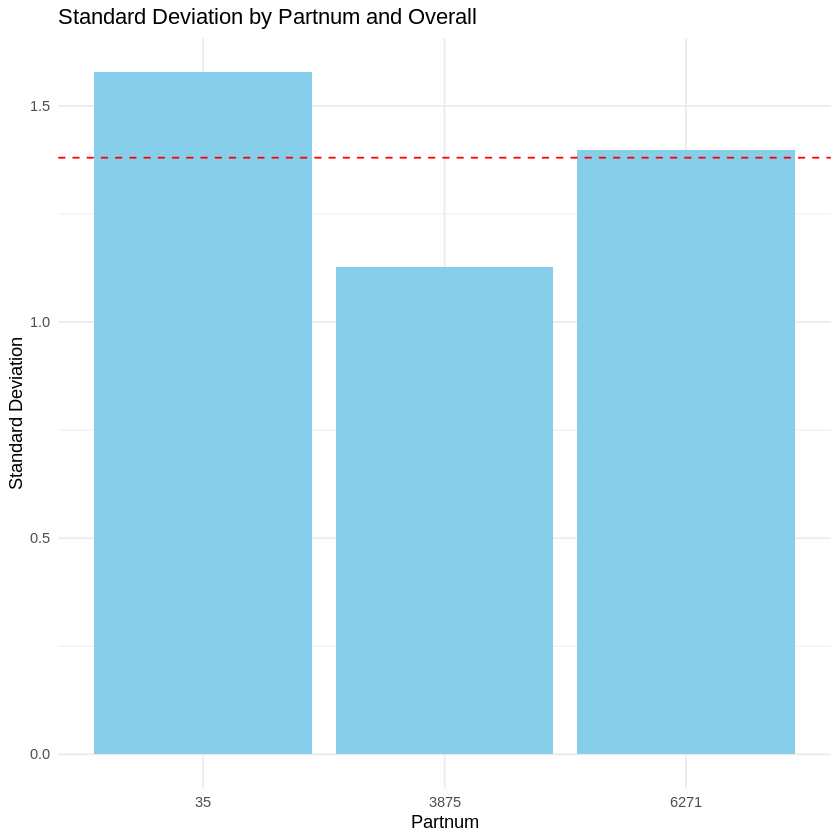

In [ ]:
# Plot for Standard Deviations
ggplot(result, aes(x = factor(partnum), y = sd_y300)) +
  geom_col(fill = "skyblue") +
  geom_hline(yintercept = sd_measurement, linetype = "dashed", color = "red") +
  labs(title = "Standard Deviation by Partnum and Overall",
       x = "Partnum",
       y = "Standard Deviation") +
  theme_minimal()

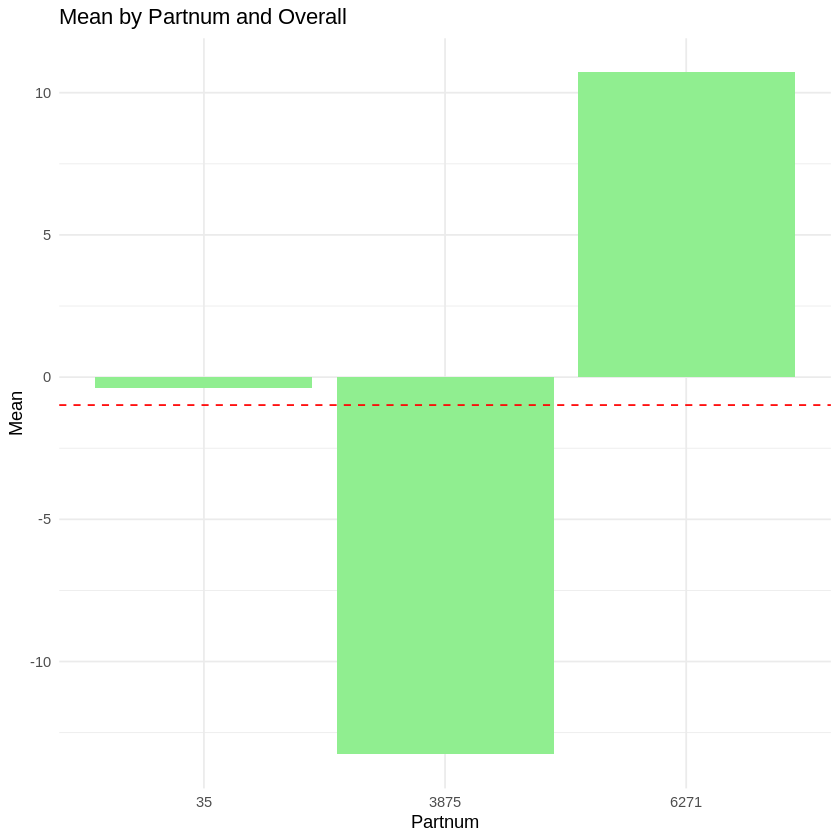

In [ ]:
# Plot for Means
ggplot(result, aes(x = factor(partnum), y = mean_y300)) +
  geom_col(fill = "lightgreen") +
  geom_hline(yintercept = overall_mean_y300, linetype = "dashed", color = "red") +
  labs(title = "Mean by Partnum and Overall",
       x = "Partnum",
       y = "Mean") +
  theme_minimal()

In [ ]:
# Calculate Mean, Min, Max, and SD By Shift
result_by_shift <- df %>%
  group_by(shift) %>%
  summarise(
    mean_y300 = mean(y300, na.rm = TRUE),
    min_y300 = min(y300, na.rm = TRUE),
    max_y300 = max(y300, na.rm = TRUE),
    sd_y300 = sd(y300, na.rm = TRUE)
  )

print("--------------------------")
# Calculate Mean, Min, Max, and SD By Day
result_by_day <- df %>%
  group_by(daycount) %>%
  summarise(
    mean_y300 = mean(y300, na.rm = TRUE),
    min_y300 = min(y300, na.rm = TRUE),
    max_y300 = max(y300, na.rm = TRUE),
    sd_y300 = sd(y300, na.rm = TRUE)
  )

  result_by_shift
  print("--------------------------")
 print("--------------------------")

  result_by_day


[1] "--------------------------"


shift,mean_y300,min_y300,max_y300,sd_y300
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.8355556,-14.2,12.8,9.73861
2,-1.0844444,-15.2,14.2,10.25036
3,-1.0266667,-14.8,12.6,10.01450


[1] "--------------------------"
[1] "--------------------------"


daycount,mean_y300,min_y300,max_y300,sd_y300
<int>,<dbl>,<dbl>,<dbl>,<dbl>
6,-0.9851852,-14.8,13.8,10.150245
7,-0.7703704,-14.6,11.8,9.996723
8,-0.6296296,-15.2,12.8,10.129880
9,-1.3333333,-15.0,14.2,10.207689
10,-1.1925926,-14.8,12.2,9.897860


In [ ]:
sd_shift = sqrt( (9.73861^2 + 10.25036^2 + 10.01450^2)/3)
sd_shift

sd_day = sqrt( (10.150245^2 + 9.996723^2 + 10.129880^2 + 	10.207689^2 + 9.897860^2) / 5)
sd_day

[1] 10.00334

[1] 10.07711

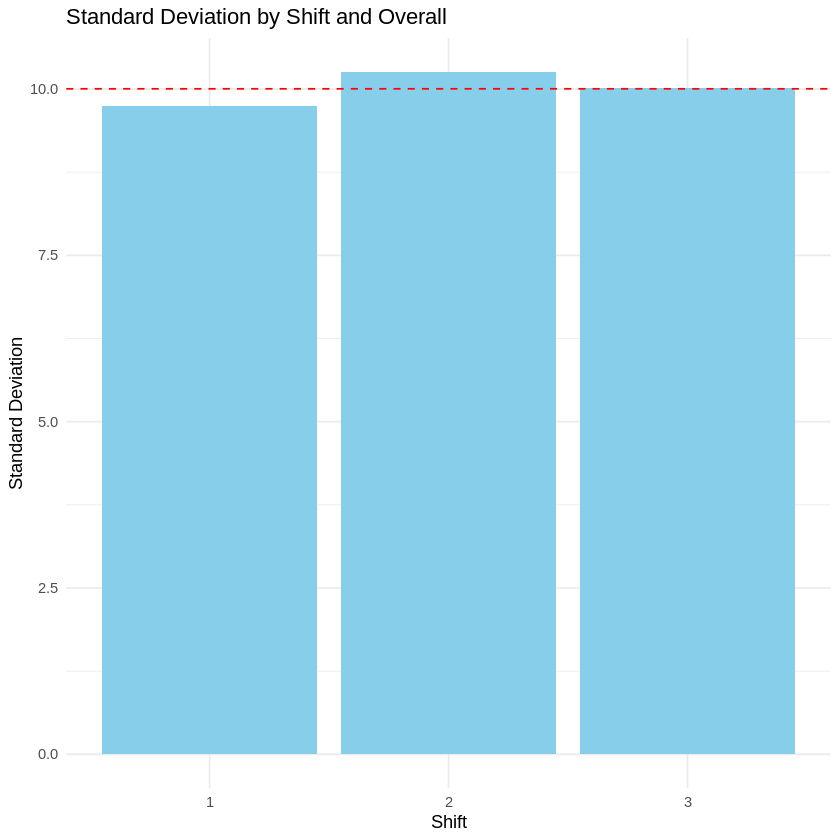

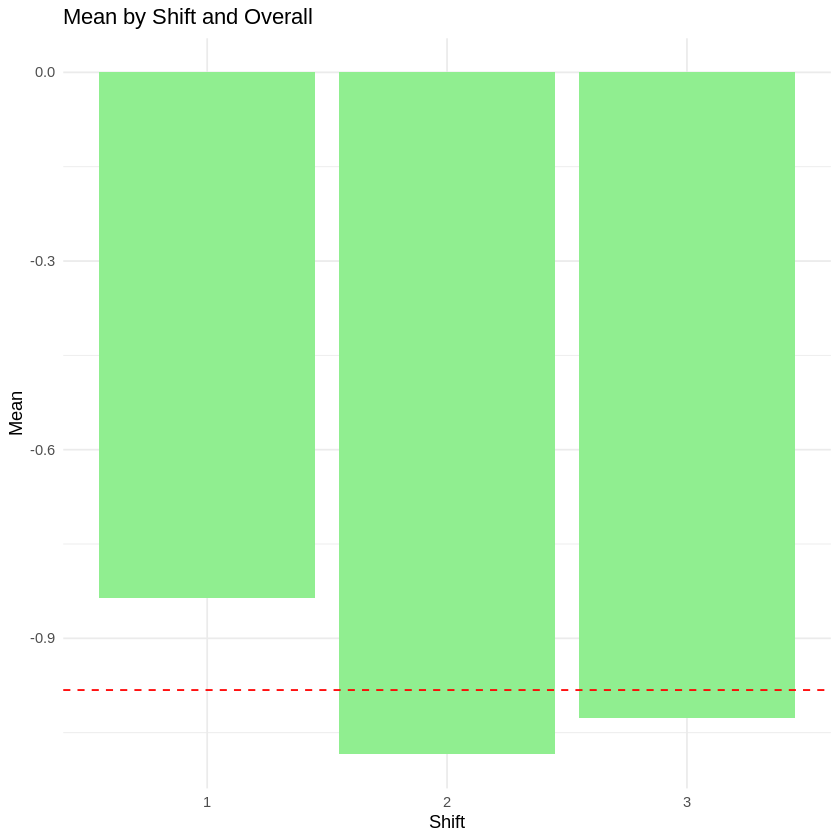

In [ ]:
# Graphs for Shift

# Plot for Standard Deviations
ggplot(result_by_shift, aes(x = factor(shift), y = sd_y300)) +
  geom_col(fill = "skyblue") +
  geom_hline(yintercept = sd_shift, linetype = "dashed", color = "red") +
  labs(title = "Standard Deviation by Shift and Overall",
       x = "Shift",
       y = "Standard Deviation") +
  theme_minimal()

# Plot for Means
ggplot(result_by_shift, aes(x = factor(shift), y = mean_y300)) +
  geom_col(fill = "lightgreen") +
  geom_hline(yintercept = overall_mean_y300, linetype = "dashed", color = "red") +
  labs(title = "Mean by Shift and Overall",
       x = "Shift",
       y = "Mean") +
  theme_minimal()

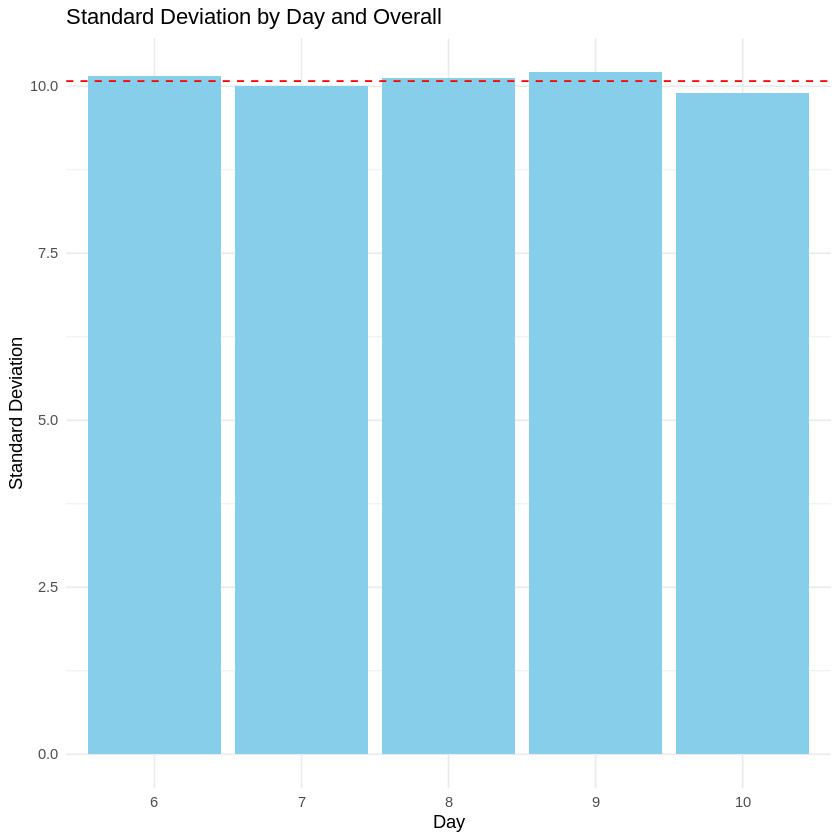

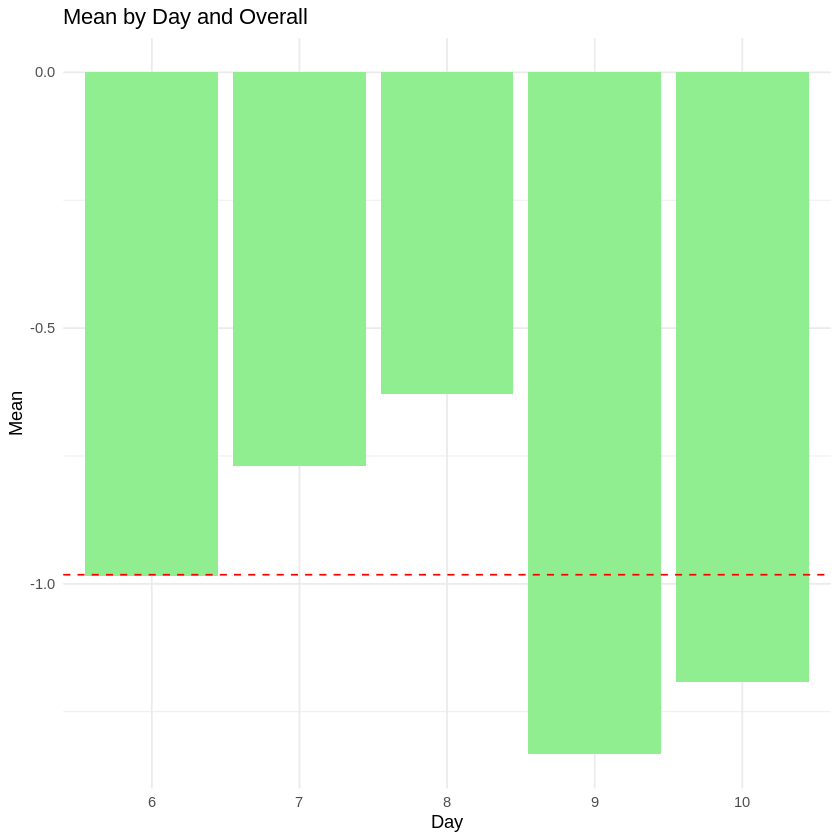

In [ ]:
# Graphs for Mean

# Plot for Standard Deviations
ggplot(result_by_day, aes(x = factor(daycount), y = sd_y300)) +
  geom_col(fill = "skyblue") +
  geom_hline(yintercept = sd_day, linetype = "dashed", color = "red") +
  labs(title = "Standard Deviation by Day and Overall",
       x = "Day",
       y = "Standard Deviation") +
  theme_minimal()

# Plot for Means
ggplot(result_by_day, aes(x = factor(daycount), y = mean_y300)) +
  geom_col(fill = "lightgreen") +
  geom_hline(yintercept = overall_mean_y300, linetype = "dashed", color = "red") +
  labs(title = "Mean by Day and Overall",
       x = "Day",
       y = "Mean") +
  theme_minimal()

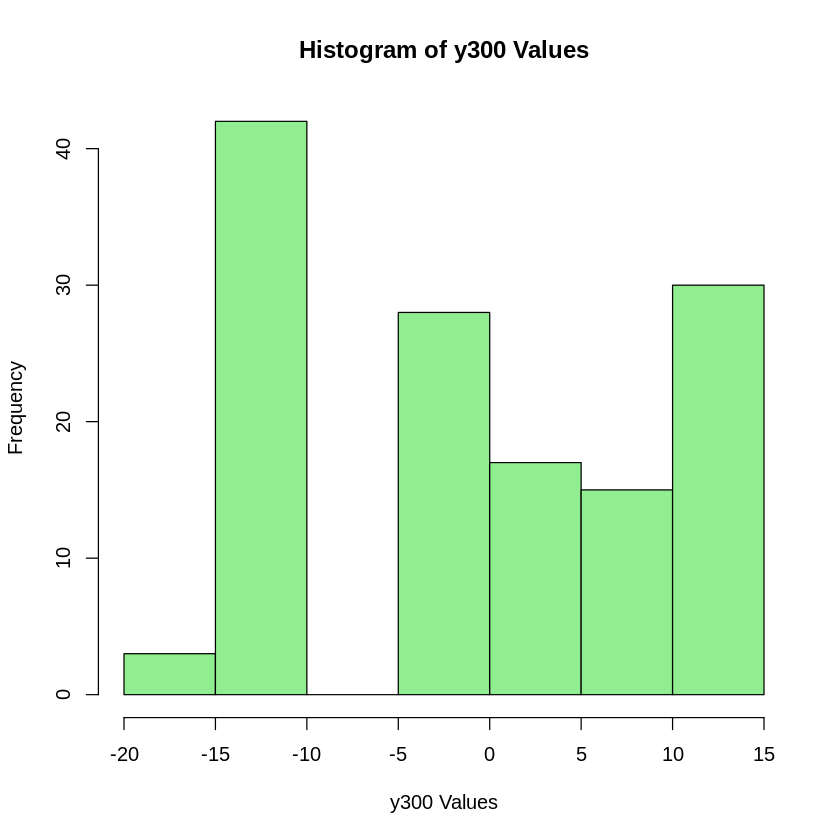

In [ ]:
# Create a histogram of the 'y300' column
  hist(df$y300, main="Histogram of y300 Values", xlab="y300 Values", ylab="Frequency", col="lightgreen", border="black")

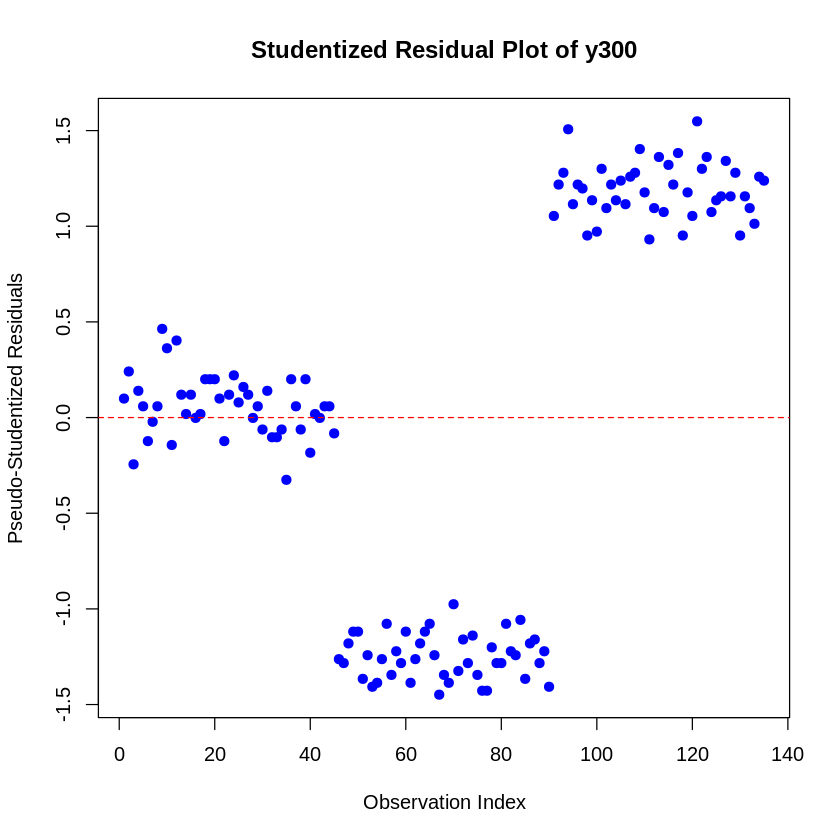

In [ ]:
# Assuming df is your data frame and y300 is the column of interest
y <- df$y300

# Step 1: Calculate mean and standard deviation
mean_y <- mean(y)
sd_y <- sd(y)

# Step 2: Calculate residuals
residuals <- y - mean_y

# Step 3 and 4: Calculate pseudo-studentized residuals
studentized_residuals <- sapply(1:length(y), function(i) {
  y_minus_i <- y[-i]
  sqrt_loo_var <- sqrt(var(y_minus_i))
  (y[i] - mean(y_minus_i)) / sqrt_loo_var
})

# Step 5: Plot the pseudo-studentized residuals
plot(studentized_residuals,
     ylab = "Pseudo-Studentized Residuals",
     xlab = "Observation Index",
     main = "Studentized Residual Plot of y300",
     pch = 19, col = "blue")
abline(h = 0, col = "red", lty = 2)


In [ ]:
# Basic Summary Statistics for the 'y300' column
summary_data <- summary(df$y300)

# Specifications
USL <- 60  # Upper Specification Limit
LSL <- 40  # Lower Specification Limit

# Ppk Calculation for 'y300'
mean_y300 <- mean(df$y300)
sd_y300 <- sd(df$y300)
Ppk <- min((USL - mean_y300) / (3 * sd_y300), (mean_y300 - LSL) / (3 * sd_y300))

# Combine Summary Data with Ppk for 'y300'
summary_list <- c(summary_data, Ppk=Ppk)

# Print the combined summary
print(summary_list)sn


       Min.     1st Qu.      Median        Mean     3rd Qu.        Max. 
-15.2000000 -12.4000000  -0.4000000  -0.9822222   9.8000000  14.2000000 
        Ppk 
 -1.3758445 


In [ ]:
df %>%
  mutate(part = factor(partnum), factor(shift)) %>%
  group_by(part) %>%
  summarise(
    mean_partnum = mean(y300),
    min_partnum = min(y300),
    max_partnum = max(y300),
    sd_partnum = sd(y300)
  )


part,mean_partnum,min_partnum,max_partnum,sd_partnum
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
35,-0.40000,-4.2,3.6,1.577685
3875,-13.26222,-15.2,-10.6,1.128009
6271,10.71556,8.2,14.2,1.397718


In [ ]:
overall_sd = sqrt( ( 1.2316840^2 + 0.9070431^2 + 1.1213324^2 )/3 )
overall_sd

[1] 1.095013

In [ ]:
df %>% mutate(partnum = factor(partnum)) -> df
lm(data = df, y300 ~ partnum) -> model_part
model_part %>% anova
sigma(model_part)


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
partnum,2,12958.8924,6479.446222,3401.218,2.825817e-114
Residuals,132,251.4649,1.905037,NA,NA


[1] 1.380231

In [ ]:
sqrt(251.4649 / 132) # Estimate of the Root Mean Square

[1] 1.380231

In [ ]:
# From First Analaysis : sd(total) = 4.8054743

sd_total = 4.8054743
sd_process = sqrt(sd_total^2 - sd_measurement^2)
sd_process

[1] 4.602993

In [ ]:
D = sd_process / sd_measurement
D

[1] 3.334945

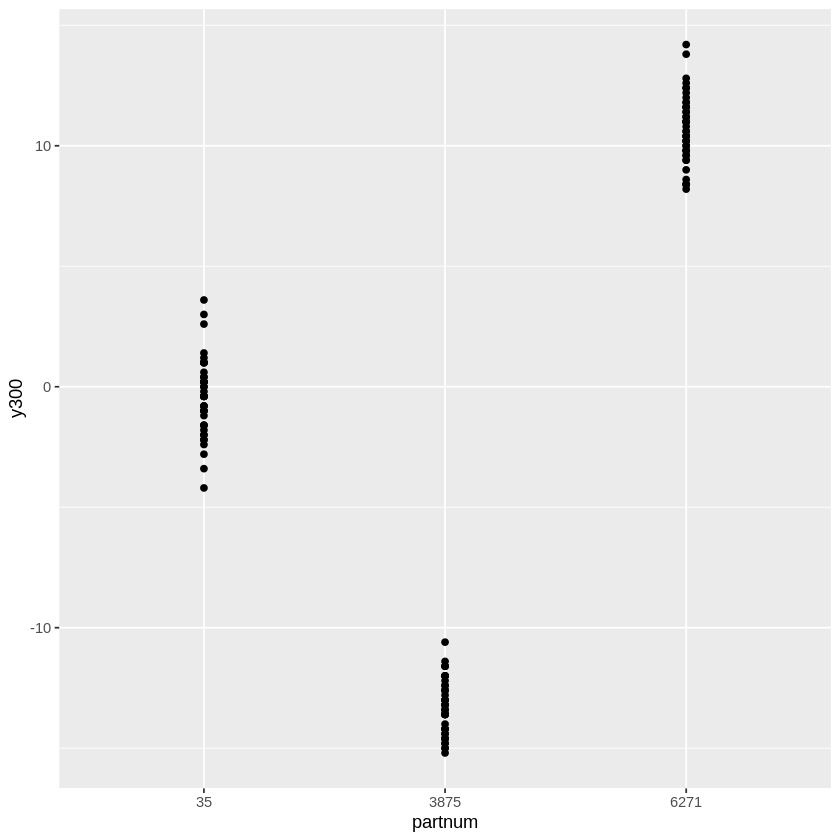

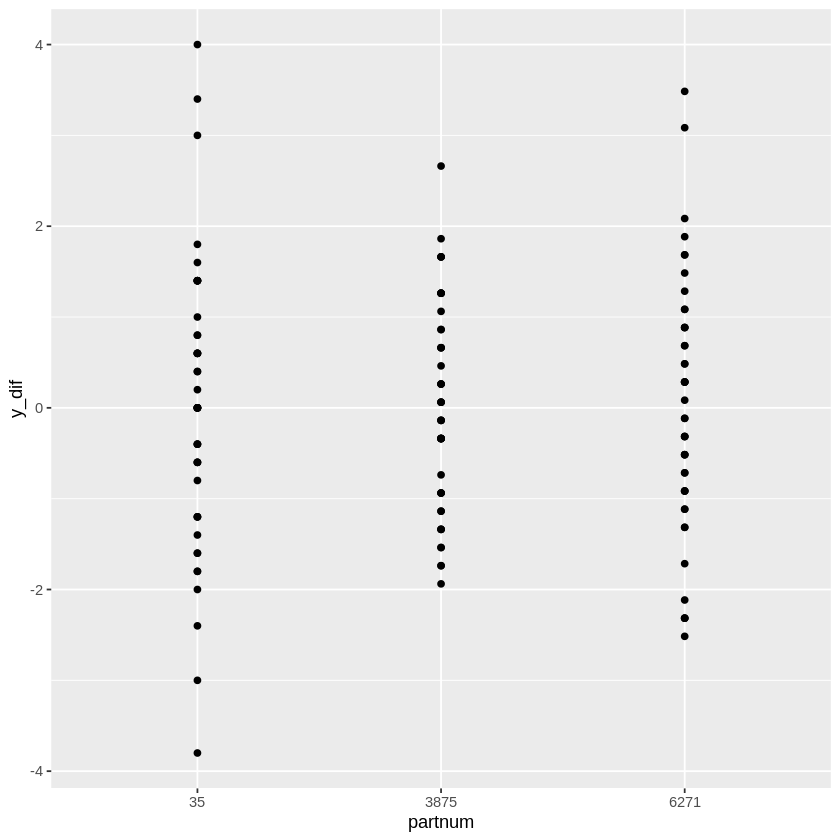

In [ ]:
df %>% ggplot(aes(x = partnum, y = y300))+geom_point()

# Step 1: Calculate the mean of y300 for each partnum and create a new column with the subtracted value
df <- df %>%
  group_by(partnum) %>%
  mutate(y_mean = mean(y300), y_dif = y300 - y_mean) %>%
  ungroup()  # Ungroup to avoid issues in further data manipulation

# Step 2: Plot using the adjusted y-values
ggplot(df, aes(x = partnum, y = y_dif)) + geom_point()

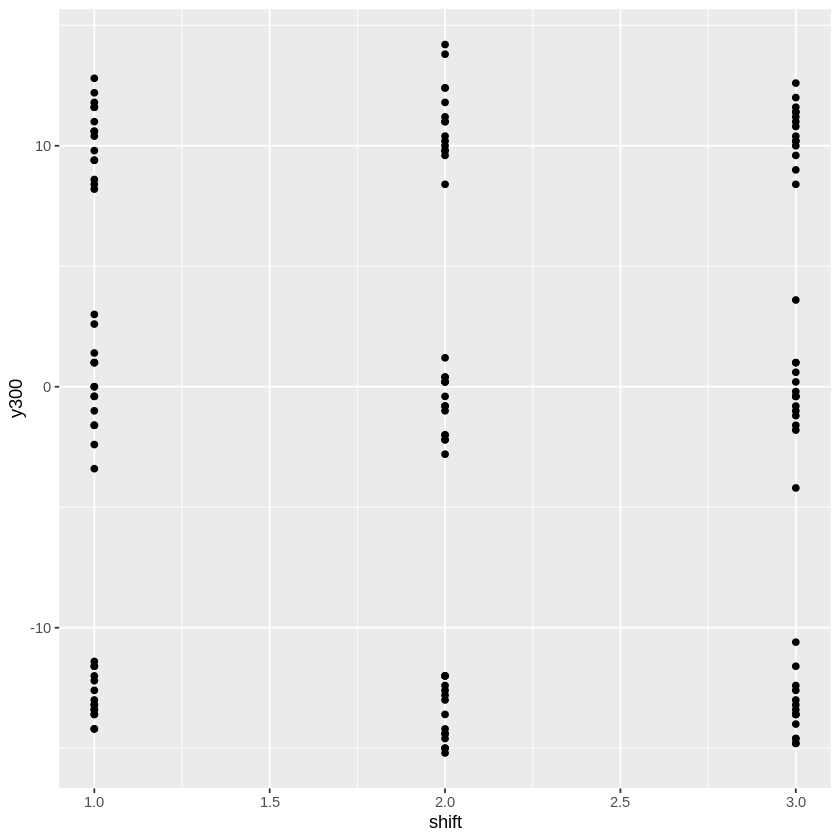

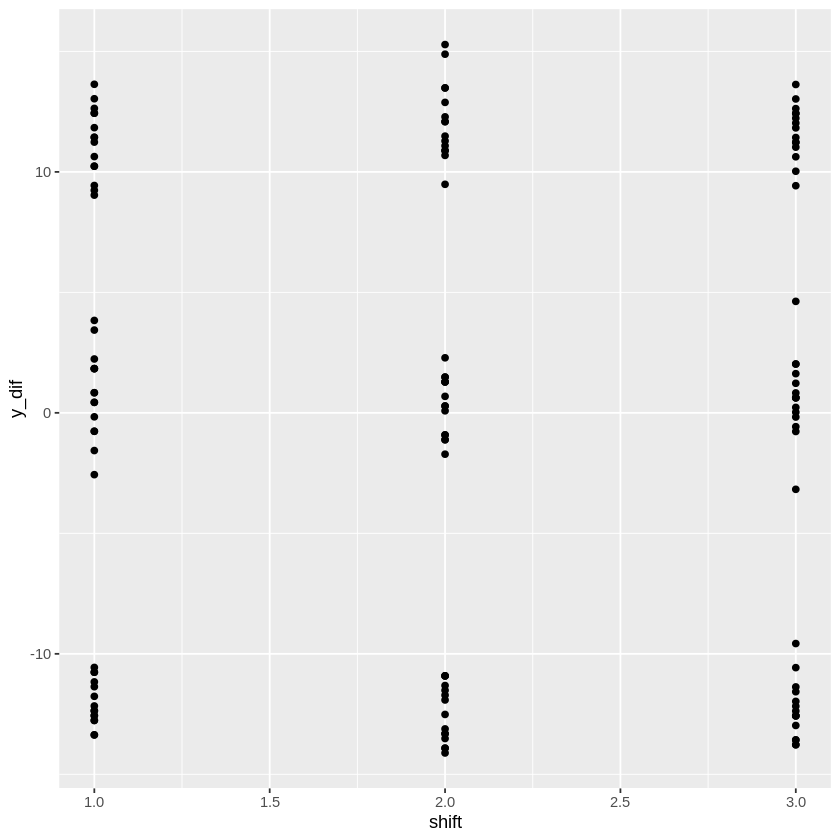

In [ ]:
df %>% ggplot(aes(x = shift, y = y300))+geom_point()

# Step 1: Calculate the mean of y300 for each partnum and create a new column with the subtracted value
df <- df %>%
  group_by(shift) %>%
  mutate(y_mean = mean(y300), y_dif = y300 - y_mean) %>%
  ungroup()  # Ungroup to avoid issues in further data manipulation

# Step 2: Plot using the adjusted y-values
ggplot(df, aes(x = shift, y = y_dif)) + geom_point()

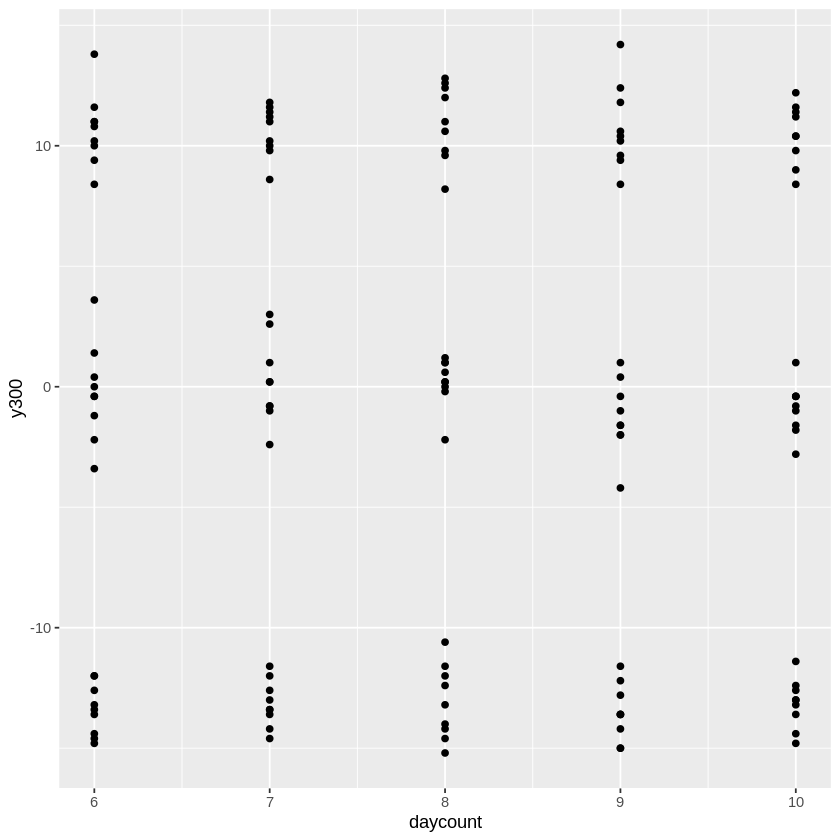

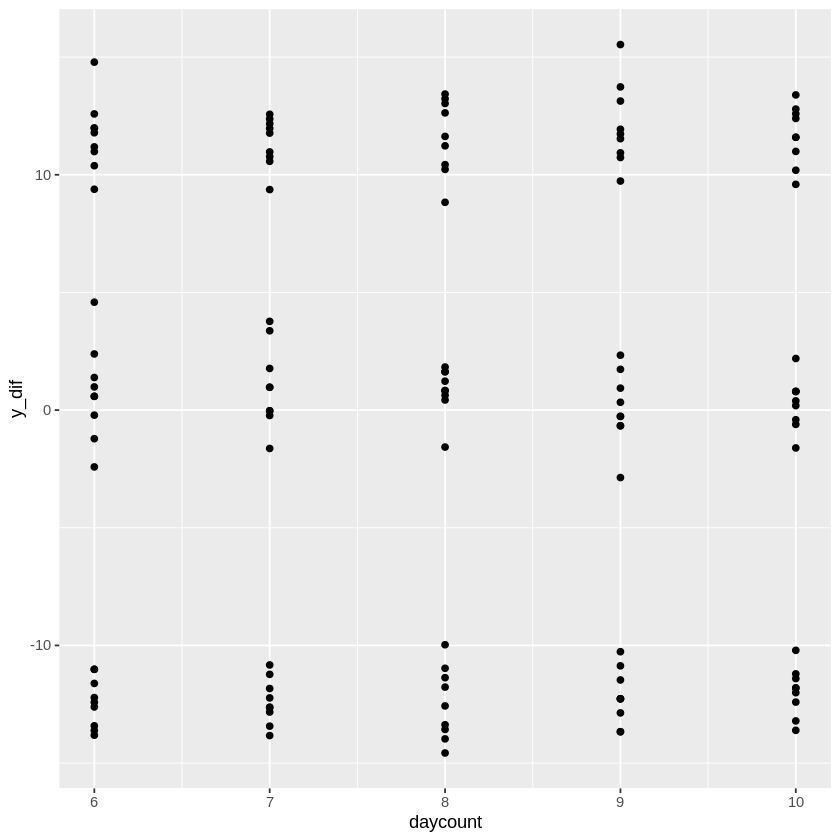

In [ ]:
df %>% ggplot(aes(x = daycount, y = y300))+geom_point()

# Step 1: Calculate the mean of y300 for each partnum and create a new column with the subtracted value
df <- df %>%
  group_by(daycount) %>%
  mutate(y_mean = mean(y300), y_dif = y300 - y_mean) %>%
  ungroup()  # Ungroup to avoid issues in further data manipulation

# Step 2: Plot using the adjusted y-values
ggplot(df, aes(x = daycount, y = y_dif)) + geom_point()